# Neural Networks Project-2 

## The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

  More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

  In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors. 

## Project Description

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks. 

## The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images

## Goal of the project

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.     Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images  (42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).   

In [1]:
# Login to google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import all the dependencies
import os
from time import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix

import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
# Visualization settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

In [0]:
# Directory for log summary
TENSORBOARD_SUMMARIES_DIR = '/content/drive/My Drive/svhn_classifier_logs'

### Load Dataset

In [0]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Project-8/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

### Reshaping the data

In [6]:
# Coverting the image to 1D data(32*32)
X_train = X_train.reshape(42000 , 1024)
print (X_train.shape)

X_test = X_test.reshape(18000 , 1024)
print (X_test.shape)

(42000, 1024)
(18000, 1024)


### Reducing the dimension of the Data with PCA

With the dimension of 1024 feature KNN algorithm was gone to hung state while predicting, hence we are goin to reduce the dimension of the dataset with PCA technique. We have plotted the graph of variance captured with the number of components and have gone with 90% variance of feature information.

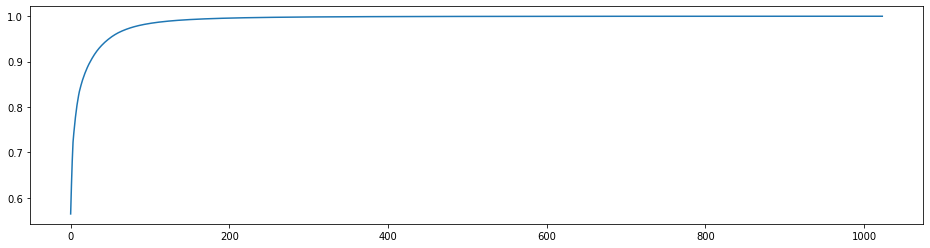

In [7]:
# Checking the elbow plot for number of components with the variances captured
pca = PCA()
pca.fit_transform(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [0]:
# Reducing the dimention of dataset upto 90% variance captured
pca_final = PCA(n_components=0.9)
X_train = pca_final.fit_transform(X_train)
X_test = pca_final.transform(X_test)

In [0]:
# Implementing the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=10 )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
# accuracy on X_test 
start = time()
accuracy = knn.score(X_test, y_test) 
end = time()
print("Prediction has been made in {:.4f} seconds with {:.4f} accuracy.".format((end-start),accuracy) )

Prediction has been made in 12.3905 seconds with 0.5066 accuracy.


In [16]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[1166,   57,   40,   43,   46,   64,  141,   27,  106,  124],
       [  91, 1297,   75,   87,   89,   47,   35,   56,   24,   27],
       [ 106,  179,  979,  122,   34,   59,   28,  167,   58,   71],
       [ 121,  216,  177,  756,   50,  173,   37,   46,   81,   62],
       [ 109,  217,   46,   63, 1163,   42,   72,   19,   39,   42],
       [ 176,  133,   81,  298,   49,  642,  126,   18,  171,   74],
       [ 335,   89,   52,   62,  108,  144,  730,   15,  245,   52],
       [ 104,  183,  170,   89,   19,   41,   28, 1100,   24,   50],
       [ 285,  108,   68,  125,   92,  170,  245,   15,  593,  111],
       [ 330,  138,   95,  101,   65,  108,   68,   56,  150,  693]])

## Reference 

Acknowledgement for the datasets.    Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning  NIPS Workshop  on Deep Learning and Unsupervised Feature Learning 2011. PDF   http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary 